#Downloading data

The data is "stolen" from this excellent tutorial on how to do a classification with R:

*   https://urbanspatial.github.io/classifying_satellite_imagery_in_R/
*   https://github.com/urbanSpatial/classifying_satellite_imagery_in_R




In [12]:
! git clone https://github.com/urbanSpatial/classifying_satellite_imagery_in_R

Cloning into 'classifying_satellite_imagery_in_R'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 106 (delta 2), reused 23 (delta 2), pack-reused 80
Receiving objects: 100% (106/106), 42.79 MiB | 25.08 MiB/s, done.
Resolving deltas: 100% (30/30), done.


#Exploring

In [9]:
!pip install rasterio
!pip install geopandas
!pip install earthpy
!pip install rasterstats

In [16]:
import os
from glob import glob
import matplotlib.pyplot as plt
import rasterio as rio
from rasterio.plot import plotting_extent
import geopandas as gpd
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

import rasterstats


## Ploting the raster

In [ ]:
#From: https://earthpy.readthedocs.io/en/latest/gallery_vignettes/plot_rgb.html

#fetches the iamges at 30m excluding the panchromatic and cirrus 
landsat_bands_data_path = "/content/classifying_satellite_imagery_in_R/data/band*[1-7]*.tif"

stack_band_paths = glob(landsat_bands_data_path)
stack_band_paths.sort()

#resorting because of the band names 
stack_band_paths_sorted = [stack_band_paths[i] for i in [0,3,4,5,6,7,8]]

#print(stack_band_paths)
#print(stack_band_paths_sorted)

# Create image stack and apply nodata value for Landsat
arr_st, meta = es.stack(stack_band_paths_sorted, nodata=-9999)

#From: https://earthpy.readthedocs.io/en/latest/gallery_vignettes/plot_rgb.html

# Create figure with one plot
fig, ax = plt.subplots(figsize=(12, 12))

ep.plot_rgb(arr_st, rgb=(3, 2, 1), ax=ax, title="Landsat 8 RGB Image")
plt.show()

##Loading and ploting the points

In [24]:
#Loading and reprojecting
sample_shp = gpd.read_file('/content/classifying_satellite_imagery_in_R/data/calgary_trainingPoints.shp')
shp_prj = sample_shp.to_crs(epsg=32612)
#shp_prj.crs
shp_prj

[ERROR] [2021-02-08 02:36:03,289:fiona._env] Unable to open EPSG support file gcs.csv.  Try setting the GDAL_DATA environment variable to point to the directory containing EPSG csv files.


,class,id,geometry
0,clouds,1.0,POINT (273026.189 5668459.275)
1,clouds,1.0,POINT (274910.786 5668286.479)
2,clouds,1.0,POINT (275346.879 5668903.405)
3,clouds,1.0,POINT (275993.389 5668347.157)
4,clouds,1.0,POINT (275833.212 5668744.188)
...,...,...,...
696,water,4.0,POINT (289879.993 5639054.215)
697,water,4.0,POINT (290748.279 5637522.819)
698,water,4.0,POINT (290663.551 5637559.526)
699,water,4.0,POINT (290709.630 5637615.015)


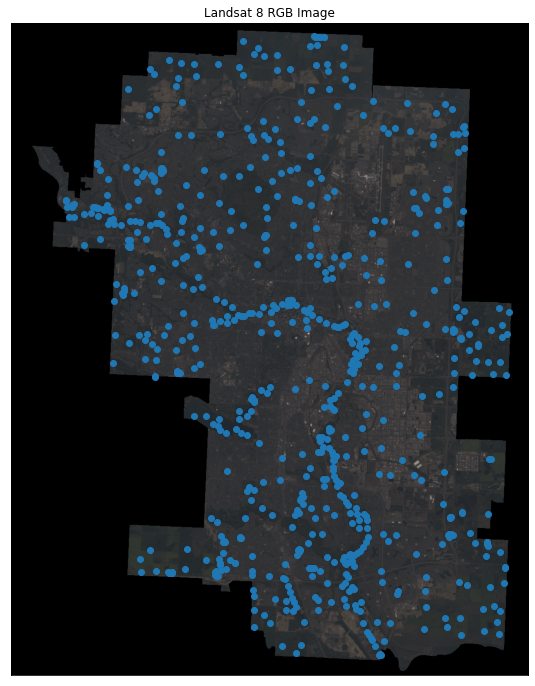

In [13]:
#we have to fetch the extent using the rasterio package
with rio.open('/content/classifying_satellite_imagery_in_R/data/band1.tif') as image_src:
  img_data = image_src.read()

  img_extent = plotting_extent(image_src)
  



fig, ax = plt.subplots(figsize=(12, 12))

ep.plot_rgb(arr_st, rgb=(3, 2, 1), ax=ax, title="Landsat 8 RGB Image",extent=(img_extent))
shp_prj.plot(ax=ax)
plt.show()

#Extracting values

In [ ]:
#first we save everything (the stacked raster and the projected shapefile to a directory)
!mkdir outputs

#saving
shp_prj.to_file('/content/outputs/sample_loc.shp')
es.stack(stack_band_paths_sorted, out_path='/content/outputs/Landsat.tif') #fails because of uint16 if we add the thermals

#other alternatives here: https://gis.stackexchange.com/questions/223910/using-rasterio-or-gdal-to-stack-multiple-bands-without-using-subprocess-commands

In [25]:
from rasterstats import point_query

for i in range(1,8):
  #pt_query = point_query('/content/outputs/sample_loc.shp',i)
  #print(pt_query[0])

  #querying the data
  pt_query = point_query('/content/outputs/sample_loc.shp','/content/outputs/Landsat.tif',band=i)
  #print(i)
  #print(pt_query[0])

  band_nr = "B"+str(i)
  print('Processing:',band_nr)

  #adding to the pandas
  shp_prj[band_nr]=pt_query

[ERROR] [2021-02-08 02:36:18,300:fiona._env] Unable to open EPSG support file gcs.csv.  Try setting the GDAL_DATA environment variable to point to the directory containing EPSG csv files.
Processing: B1
[ERROR] [2021-02-08 02:36:21,701:fiona._env] Unable to open EPSG support file gcs.csv.  Try setting the GDAL_DATA environment variable to point to the directory containing EPSG csv files.
Processing: B2
[ERROR] [2021-02-08 02:36:25,152:fiona._env] Unable to open EPSG support file gcs.csv.  Try setting the GDAL_DATA environment variable to point to the directory containing EPSG csv files.
Processing: B3
[ERROR] [2021-02-08 02:36:28,445:fiona._env] Unable to open EPSG support file gcs.csv.  Try setting the GDAL_DATA environment variable to point to the directory containing EPSG csv files.
Processing: B4
[ERROR] [2021-02-08 02:36:31,751:fiona._env] Unable to open EPSG support file gcs.csv.  Try setting the GDAL_DATA environment variable to point to the directory containing EPSG csv files.


#AutoSklearn

- has a very hard installation... bear with me
- distributed has to be removed and reinstalled
- And that implies restarting the runtime 

https://automl.github.io/auto-sklearn/master/

In [ ]:
#it is a hard install on jupyter notebook


!pip install PipelineProfiler

!apt-get install swig -y
!pip install Cython numpy
!sudo apt-get install build-essential swig

import distributed
print(distributed.__version__)

!pip uninstall distributed
!pip install distributed

import distributed
print(distributed.__version__)

In [ ]:
!curl https://raw.githubusercontent.com/automl/auto-sklearn/master/requirements.txt | xargs -n 1 -L 1 pip install 

In [ ]:
!pip install auto-sklearn==0.11.0 #weirdly this might require multiple attempts, something crashes in pyrfr or elsewhere. ALSO installing an earlier version because latest update crashes

In [4]:
#to investigate outputs of autosklearn
import sklearn

import PipelineProfiler
import autosklearn

##Example 

In [ ]:
#Example

import autosklearn.classification
import sklearn.model_selection
import sklearn.datasets
import sklearn.metrics


if __name__ == "__main__":
  X, y = sklearn.datasets.load_digits(return_X_y=True)
  X_train, X_test, y_train, y_test = \
          sklearn.model_selection.train_test_split(X, y, random_state=1)
  automl = autosklearn.classification.AutoSklearnClassifier(time_left_for_this_task=60)
  automl.fit(X_train, y_train)
  y_hat = automl.predict(X_test)
  print("Accuracy score", sklearn.metrics.accuracy_score(y_test, y_hat))

### Exploring the pipelines

In [ ]:
prof_data = PipelineProfiler.import_autosklearn(automl)
PipelineProfiler.plot_pipeline_matrix(prof_data)

## Applying to our data

In [38]:
#removing NA from the datasets
test_data = shp_prj
test_data = test_data.dropna(0)


#selecting data and conerting to category
df_x = test_data[["B1","B2","B3","B4","B5","B6","B7"]]
df_y = test_data[['class']].astype('category')




In [ ]:
auto_mdl = autosklearn.classification.AutoSklearnClassifier(time_left_for_this_task=120,
                                                       
                                                       resampling_strategy='cv',
                                                       resampling_strategy_arguments= {'folds': 5},
                                                       seed=42,
                                                       n_jobs=-1)

auto_mdl.fit(df_x,df_y)

## Investigating the output model

In [ ]:
prof_data = PipelineProfiler.import_autosklearn(auto_mdl)
PipelineProfiler.plot_pipeline_matrix(prof_data)

#Predicting on a raster